# Libraries

In [1]:
import gdown
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data Load

In [2]:
url_train = 'https://drive.google.com/file/d/1aIlnJEYe3SwztBjWLZ7IKFR9mYfi02nl/view?usp=drive_link'

train_file_id = url_train.split('/')[-2]

dwn_url_train ='https://drive.google.com/uc?id=' + train_file_id

df = pd.read_csv(dwn_url_train)

# Data Information

In [3]:
columns = [col for col in df.columns if col not in ['Unnamed: 5']]
df = df[columns]
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [5]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


# EDA

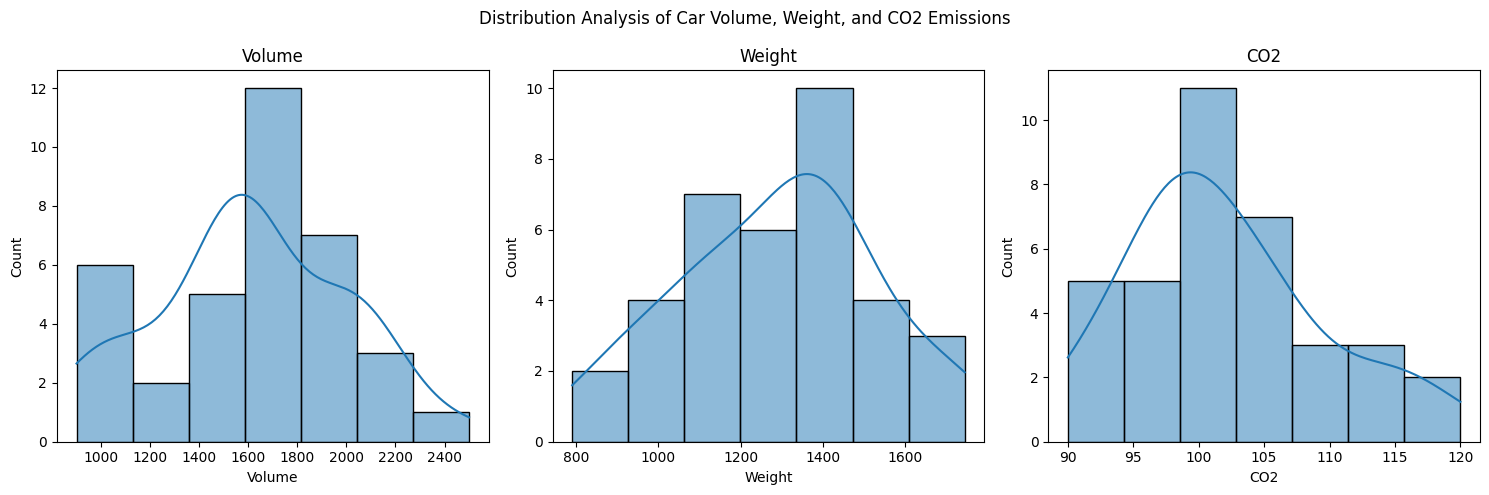

In [6]:
col_eda = [col for col in df.columns if df[col].dtype == 'int64']

fig, axes = plt.subplots(1,3, figsize = (15, 5))
axes = axes.flatten()

for i, col in enumerate(col_eda):
  sns.histplot(df[col], kde=True, ax=axes[i])
  axes[i].set_title(col)

fig.suptitle('Distribution Analysis of Car Volume, Weight, and CO2 Emissions')
plt.tight_layout()
plt.show()

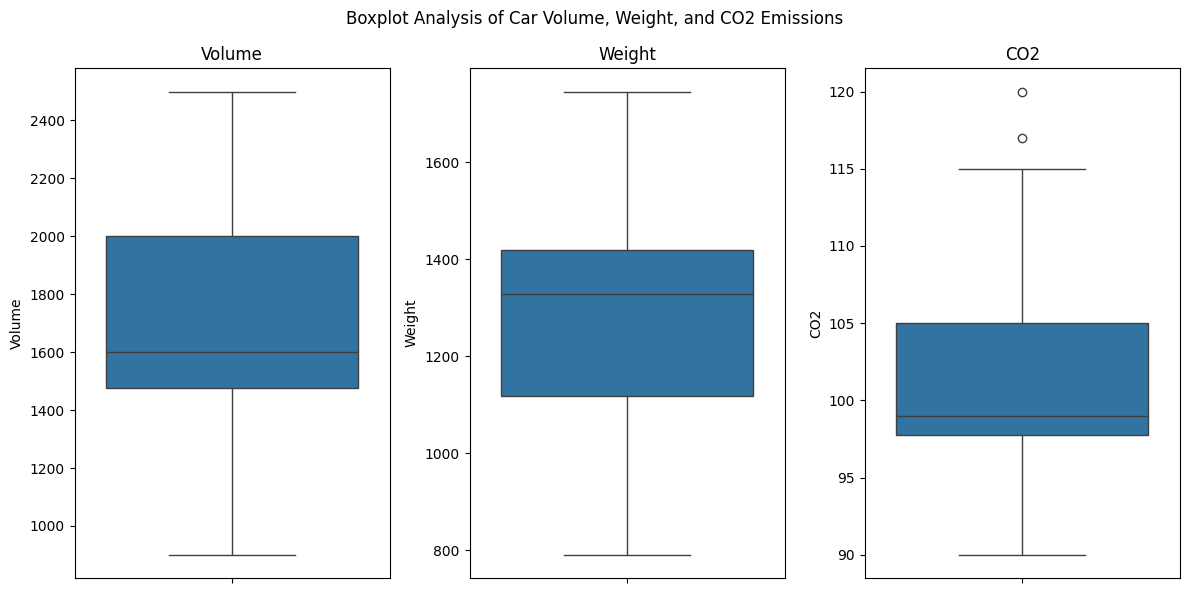

In [7]:
col_eda = [col for col in df.columns if df[col].dtype == 'int64']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(col_eda):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

fig.suptitle('Boxplot Analysis of Car Volume, Weight, and CO2 Emissions')
plt.tight_layout()
plt.show()

## Correlation EDA

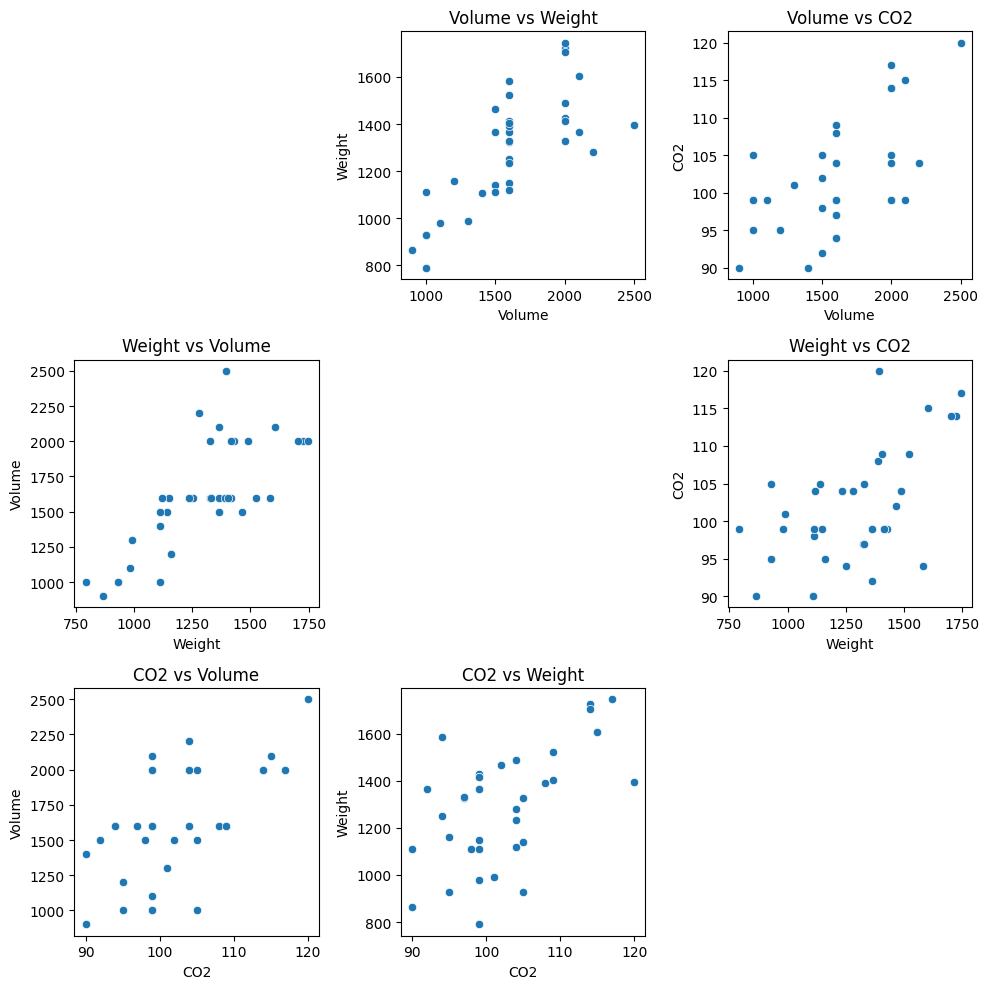

In [8]:
fig, axes = plt.subplots(len(col_eda), len(col_eda), figsize=(10, 10))

for i, col1 in enumerate(col_eda):
  for j, col2 in enumerate(col_eda):
    if i != j:
      sns.scatterplot(x=df[col1], y=df[col2], ax=axes[i, j])
      axes[i, j].set_title(f'{col1} vs {col2}')
      axes[i, j].set_xlabel(col1)
      axes[i, j].set_ylabel(col2)
    else:
      fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

In [9]:
corr_by_target = df[col_eda].corr()['CO2'].sort_values()
corr_by_target

Weight    0.552150
Volume    0.592082
CO2       1.000000
Name: CO2, dtype: float64

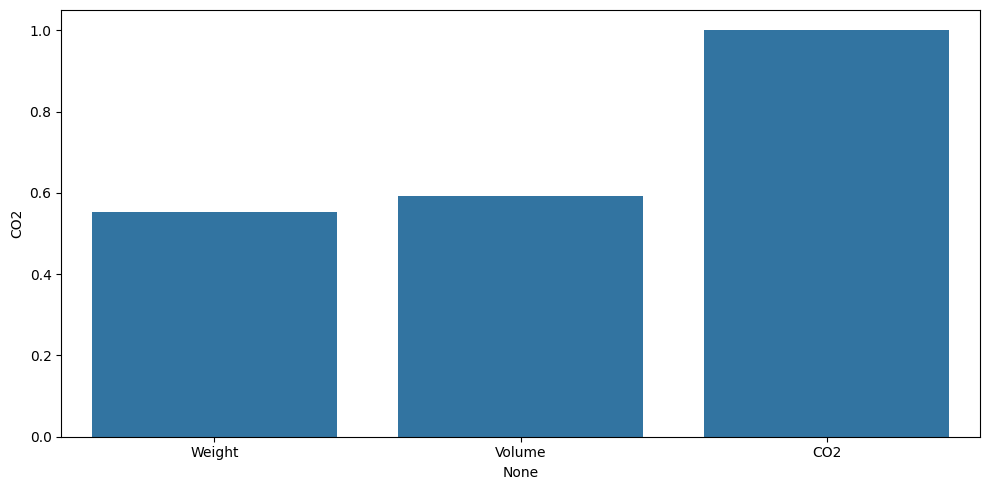

In [10]:
plt.figure(figsize = (10,5))
sns.barplot(x = corr_by_target.index, y = corr_by_target)

plt.tight_layout()
plt.show()

# Data Preprocessing

## Train Test Split

In [11]:
features = [col for col in df.columns if col not in ['CO2', 'Car', 'Model']]
target = 'CO2'

In [12]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Data Modelling

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"MAE (train): {mae_train}")
print(f"MSE (train): {mse_train}")
print(f"RMSE (train): {rmse_train}")

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"MAE (test): {mae_test}")
print(f"MSE (test): {mse_test}")
print(f"RMSE (test): {rmse_test}")

MAE (train): 4.647253536064064
MSE (train): 29.08577456530735
RMSE (train): 5.393122895438908
MAE (test): 6.335639624274503
MSE (test): 58.07928583657771
RMSE (test): 7.620976698335832


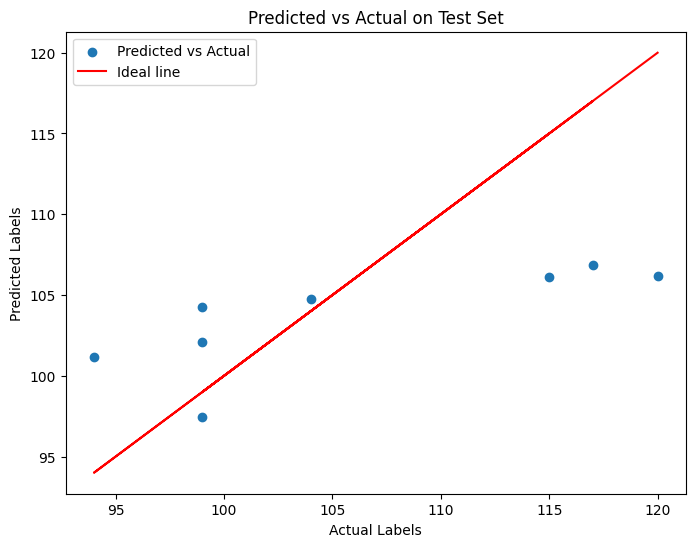

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Ideal line')
plt.title('Predicted vs Actual on Test Set')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.show()

In [15]:
parameters = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1]
}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters found:")
print(grid.best_params_)
print()

best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"MAE (train): {mae_train}")
print(f"MSE (train): {mse_train}")
print(f"RMSE (train): {rmse_train}")

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"MAE (test): {mae_test}")
print(f"MSE (test): {mse_test}")
print(f"RMSE (test): {rmse_test}")

Best parameters found:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

MAE (train): 4.647253536064064
MSE (train): 29.08577456530735
RMSE (train): 5.393122895438908
MAE (test): 6.335639624274503
MSE (test): 58.07928583657771
RMSE (test): 7.620976698335832


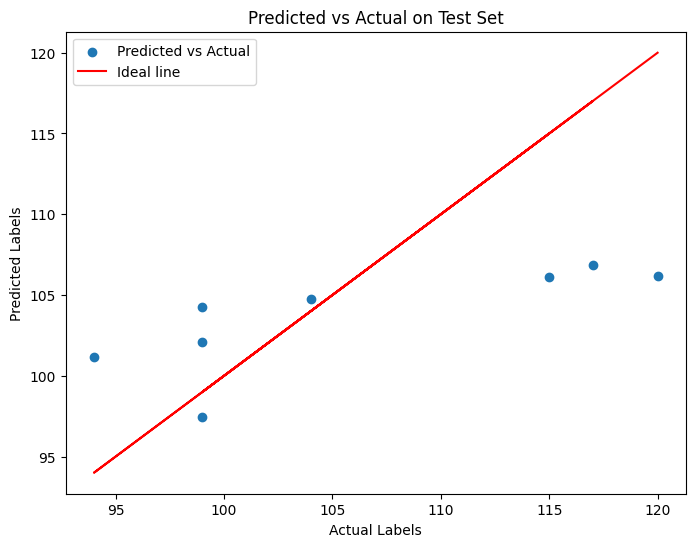

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Ideal line')
plt.title('Predicted vs Actual on Test Set')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.show()

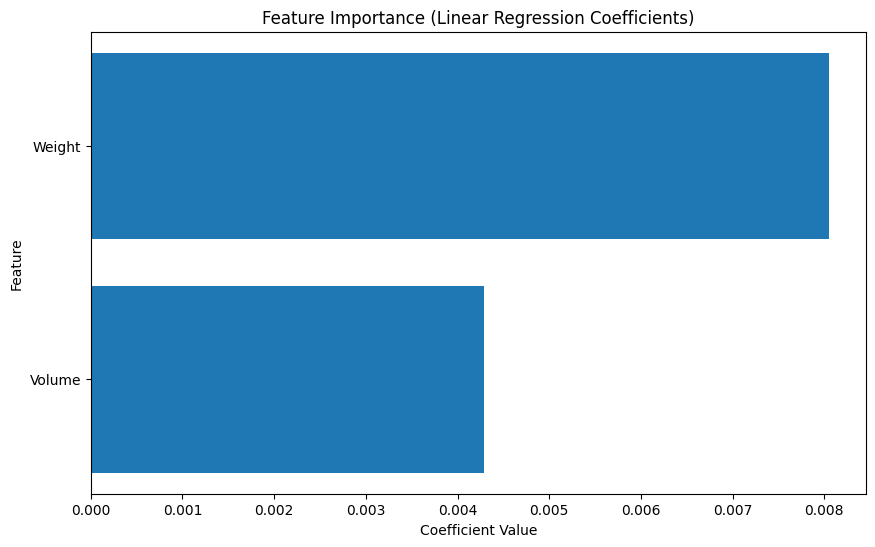

In [17]:
coefficients = best_model.coef_
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()